In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# x0 = np.load('pcam_reb_x_0.npy')
# x1 = np.load('pcam_reb_x_1.npy')
# t0 = np.load('pcam_reb_t_0.npy')
# t1 = np.load('pcam_reb_t_1.npy')
# title = 'pcam_reb'  # AKF is better

# x0 = np.load('pcam_x_0.npy')
# x1 = np.load('pcam_x_1.npy')
# t0 = np.load('pcam_t_0.npy')
# t1 = np.load('pcam_t_1.npy')
# title = 'pcam'   # AB is better

# x0 = np.load('cell_x_0.npy')
# x1 = np.load('cell_x_1.npy')
# t0 = np.load('cell_t_0.npy')
# t1 = np.load('cell_t_1.npy')
# title = 'cell'   # equal

# x0 = np.load('cell_reb_x_0.npy')
# x1 = np.load('cell_reb_x_1.npy')
# t0 = np.load('cell_reb_t_0.npy')
# t1 = np.load('cell_reb_t_1.npy')
# title = 'cell_reb'  # AB is better here

# x0 = np.load('xray_x_0.npy')
# x1 = np.load('xray_x_1.npy')
# t0 = np.load('xray_t_0.npy')
# t1 = np.load('xray_t_1.npy')
# title = 'xray' # AKF is better here

# x0 = np.load('chx_reb_x_0.npy')
# x1 = np.load('chx_reb_x_1.npy')
# t0 = np.load('chx_reb_t_0.npy')
# t1 = np.load('chx_reb_t_1.npy')
# title = 'xray reb' # AKF is better here


# x0 = np.load('rebalance_mnist_x0.npy')
# x1 = np.load('rebalance_mnist_x1.npy')
# t0 = np.load('rebalance_mnist_t0.npy')
# t1 = np.load('rebalance_mnist_t1.npy')
# title = 'mnist rebalance' # AKF is better here

# x0 = np.load('shifted_mnist_x0.npy')
# x1 = np.load('shifted_mnist_x1.npy')
# t0 = np.load('shifted_mnist_t0.npy')
# t1 = np.load('shifted_mnist_t1.npy')
# title = 'mnist shift' # AKF is better here

test = np.load('bcss_test.npy')
test_label = np.load('bcss_test_labels.npy')
train = np.load('bcss_train.npy')
train_label = np.load('bcss_train_labels.npy')
title = 'bcss' 
class_id = 2

In [3]:
if title == 'bcss':
    title = 'bcss_'+str(class_id) 
    class_idx = np.where(train_label == class_id)   # Target
    x1 = train[class_idx, class_id][0]
    
    class_idx = np.where(train_label != class_id)   # Null
    x0 = train[class_idx, class_id][0]

    class_idx = np.where(test_label == class_id)    # Target
    t1 = test[class_idx, class_id][0]
    
    class_idx = np.where(test_label != class_id)    # Null
    t0 = test[class_idx, class_id][0]
    
train = np.concatenate((x0, x1))
test = np.concatenate((t0, t1))    

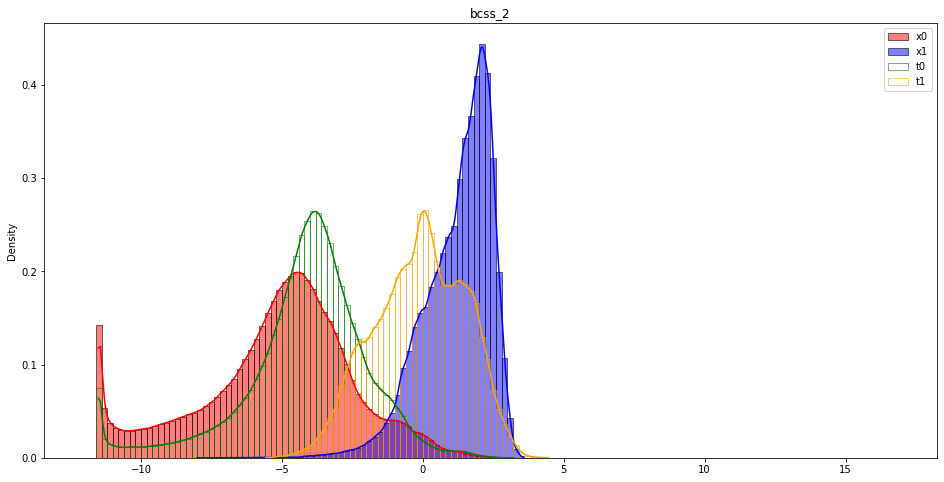

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
# a=sns.histplot(train, bins=bin_range, stat='density', color='purple', kde=True, fill=True)
# a=sns.histplot(test, bins=bin_range, stat='density',color='yellow', kde=True, fill=True)
a=sns.histplot(x0, bins=bin_range, stat='density',color='red', kde=True, fill=True, label='x0')
a=sns.histplot(x1, bins=bin_range, stat='density',color='blue', kde=True, fill=True, label='x1')
a=sns.histplot(t0, bins=bin_range, stat='density',color='green', kde=True, fill=False, label='t0')
a=sns.histplot(t1, bins=bin_range, stat='density',color='orange', kde=True, fill=False, label='t1')
f = plt.figure()
leg = ax.legend(loc="upper right")
ax.set_title(title)
plt.show()

In [5]:
alpha = len(x0)/len(train)   # class ratio of the training test
beta = len(t0)/len(test)    # Class ratio of the test sets

bin_range = np.arange(-12,17,0.5)

In [6]:
def normalize_histogram(hist):
    return hist/np.sum(hist)

# Andrey's code (AB)
test = np.concatenate((t0, t1))
num_bins = 50 
bin_edges = np.linspace(np.min(x0), np.max(x0), num_bins + 1)

test_neg_pred = test[test<0.0]
test_pos_pred = test[test>0.0]

stat = False
bin_count_train_neg = np.bincount(np.digitize(x0, bin_edges))
bin_count_train_pos = np.bincount(np.digitize(x1, bin_edges))

was  = x0.shape[0] / train.shape[0]
now  = len(test[test<0]) / test.shape[0]

bin_count_train_neg[-15:-1] = bin_count_train_neg[-15:-1] / was * now
bin_count_train = bin_count_train_neg + bin_count_train_pos

bin_index_test      = np.digitize(test, bin_edges)
bin_count_test      = np.bincount(bin_index_test)


train_relate_ratio    = bin_count_train_neg / bin_count_train
lamb        = np.nansum(bin_count_test * train_relate_ratio / test.shape[0])    
train_relate    = (np.nan_to_num(train_relate_ratio, nan=1) * bin_count_test).round().astype(int)
# print("Len test neg", len(test_neg_pred))
# train_relate    = (T_a*len(test_neg_pred)).round().astype(int)
# print(np.mean(train_relate))


bin_cut = 0
negative_list, positive_list = [], []
for i, _ in enumerate(bin_edges):
    if i > bin_cut and i < 49:
        negative_list.extend(test[bin_index_test == i][:train_relate[i+1]])
        positive_list.extend(test[bin_index_test == i][train_relate[i+1]:])

# # print(positive_list)
AB_test_neg = np.concatenate([negative_list, 
                              test_neg_pred[test_neg_pred < bin_edges[bin_cut]], 
                              test_neg_pred[test_neg_pred > bin_edges[48]]])
AB_test_pos = np.concatenate([positive_list, 
                              test_pos_pred[test_pos_pred < bin_edges[bin_cut]], 
                              test_pos_pred[test_pos_pred > bin_edges[48]]])

AB_test = np.concatenate((AB_test_neg, AB_test_pos))

ab_mean =  np.mean(AB_test_neg)
ab_std = np.std(AB_test_neg)
print('AB mean test_neg: ', ab_mean)
print('AB std test_neg: ', ab_std)

x0_mean = np.mean(x0)
x0_std =  np.std(x0)
print('x0 mean: ', x0_mean)
print('x0 std : ', x0_std)

AB_test_adjusted = (test - ab_mean)/ab_std *x0_std + x0_mean
# AB_test_adjusted = (AB_test_neg - ab_mean)/ab_std *np.std(test_neg_pred) + np.mean(test_neg_pred)

# AB_test_adjusted = np.concatenate((AB_test_adjusted, AB_test_pos))

AB_test_adjusted_neg  = (t0 - ab_mean)/ab_std *x0_std + x0_mean 

t0_mean = np.mean(t0)
t0_std =  np.std(t0)
print('t0 mean: ', t0_mean)
print('t0 std: ', t0_std)

print('AB_test_adjusted mean: ', np.mean(AB_test_adjusted))
print('AB_test_adjusted std: ', np.std(AB_test_adjusted))


C:\Users\kfattila\AppData\Local\Temp/ipykernel_732/4212389417.py:26: RuntimeWarning: invalid value encountered in true_divide
  train_relate_ratio    = bin_count_train_neg / bin_count_train


AB mean test_neg:  -4.169623445473183
AB std test_neg:  2.0814254873316322
x0 mean:  -5.1785988326988415
x0 std :  2.722021761950877
t0 mean:  -4.190758284542989
t0 std:  2.268552495746317
AB_test_adjusted mean:  -4.8027401056878505
AB_test_adjusted std:  3.2317194523081025


In [7]:
# AKF's code 
bin_range = bin_edges
bin_midpoints = (bin_range[:-1]+bin_range[1:])/2

[X_s,_] = np.histogram(train, density=True, bins=bin_range)
[T_s,_] = np.histogram(test, density=True, bins=bin_range)
[X_1,_] = np.histogram(x1, density=True, bins=bin_range)
[X_0,_] = np.histogram(x0, density=True, bins=bin_range)
[T_1,_] = np.histogram(t1, density=True, bins=bin_range)
[T_0,_] = np.histogram(t0, density=True, bins=bin_range)

X_1 = normalize_histogram(X_1)
X_0 = normalize_histogram(X_0)

beta_prime = len(test[test<0.0])/len(test)

ratio = X_1/(beta_prime*X_0+(1-beta_prime)*X_1)
ratio[np.isnan(ratio)] = 0

try:
    neg=np.max(np.where(ratio>=1/(1-beta_prime)*0.99))
    ratio[neg:]=1/(1-beta_prime)
except:
    a = 9

T_1a = T_s*ratio
# T_a = normalize_histogram(T_1a)
T_a = (T_s-(1-beta_prime)*T_1a)/(beta_prime)
T_a = normalize_histogram(T_a)

# print(T_a)


akf_mean = np.sum(T_a*bin_midpoints)
akf_std = np.sqrt(np.sum(T_a*(bin_midpoints-akf_mean)**2))

print('AKF mean test_neg: ', akf_mean)
print('AKF std test_neg: ', akf_std)

AKF_test_adjusted = (test - akf_mean)/akf_std *x0_std + x0_mean
# AKF_test_adjusted = (AKF_test_adjusted - akf_mean)/akf_std *x0_std + x0_mean
# AKF_test_adjusted_neg = (t0 - akf_mean)/akf_std *x0_std + x0_mean
# AKF_test_adjusted = (test_neg_pred - akf_mean)/akf_std  *np.std(test_neg_pred) + np.mean(test_neg_pred)
# AKF_test_adjusted = np.concatenate((AKF_test_adjusted, test_pos_pred))

# AKF_test_adjusted_neg = (t0 - akf_mean)/akf_std *np.std(test_neg_pred) + np.mean(test_neg_pred)
AKF_test_adjusted_neg = (t0 - akf_mean)/akf_std  *x0_std + x0_mean

AKF mean test_neg:  -4.104587225380648
AKF std test_neg:  2.282384370157363


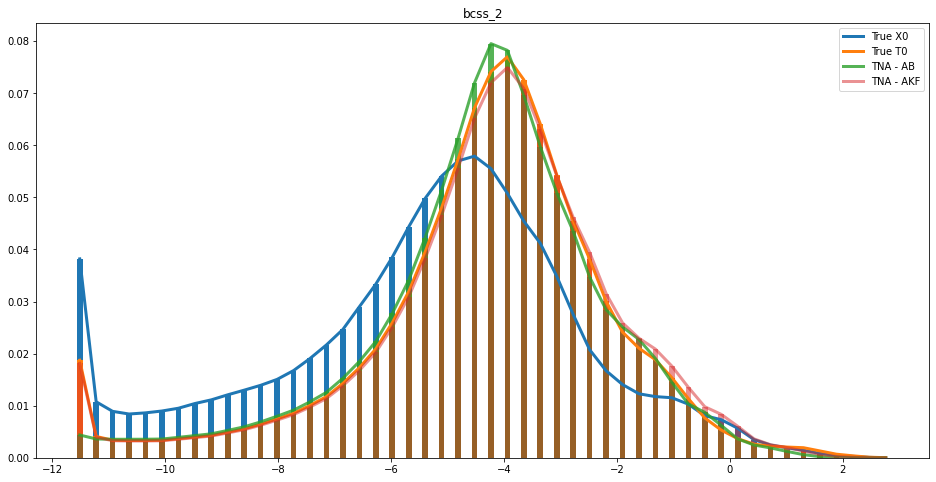

bcss_2_test_neg_AKF_hist


In [8]:
fig, ax = plt.subplots(figsize=(16,8))
stat='density'
fill = False
bar_width = 0.1
line_width = 3

[AB_test_neg_hist,_] = np.histogram(AB_test_neg, density=True, bins=bin_range)
AB_test_neg_hist = normalize_histogram(AB_test_neg_hist)

plt.bar(bin_range[:-1], X_0/np.sum(X_0),alpha=1, width=bar_width)
plt.plot(bin_range[:-1], X_0/np.sum(X_0),alpha=1, label='True X0', linewidth=line_width)
plt.bar(bin_range[:-1], T_0/np.sum(T_0),alpha=1, width=bar_width)
plt.plot(bin_range[:-1], T_0/np.sum(T_0),alpha=1, label='True T0', linewidth=line_width)
plt.bar(bin_range[:-1], AB_test_neg_hist, alpha=0.8, width=bar_width)
plt.plot(bin_range[:-1], AB_test_neg_hist, alpha=0.8, label='TNA - AB', linewidth=line_width)
plt.bar(bin_range[:-1], T_a, alpha=0.5, width=bar_width)
plt.plot(bin_range[:-1], T_a, alpha=0.5, label='TNA - AKF', linewidth=line_width)

train_relate_hist = normalize_histogram(train_relate)

# plt.bar(bin_edges, train_relate_hist[:-1], alpha=0.5, width=bar_width)
# plt.plot(bin_edges, train_relate_hist[:-1], alpha=0.5, label='TNA - train_relate', linewidth=line_width)

leg = ax.legend(loc="upper right")
plt.title(title)
# plt.xlim((-1.5, 4))
# plt.ylim((0.0, 0.1))
plt.show()

np.save(title+"_test_neg_AB", AB_test_neg)
np.save(title+"_test_neg_AKF_hist", T_a)
print(title+"_test_neg_AKF_hist")

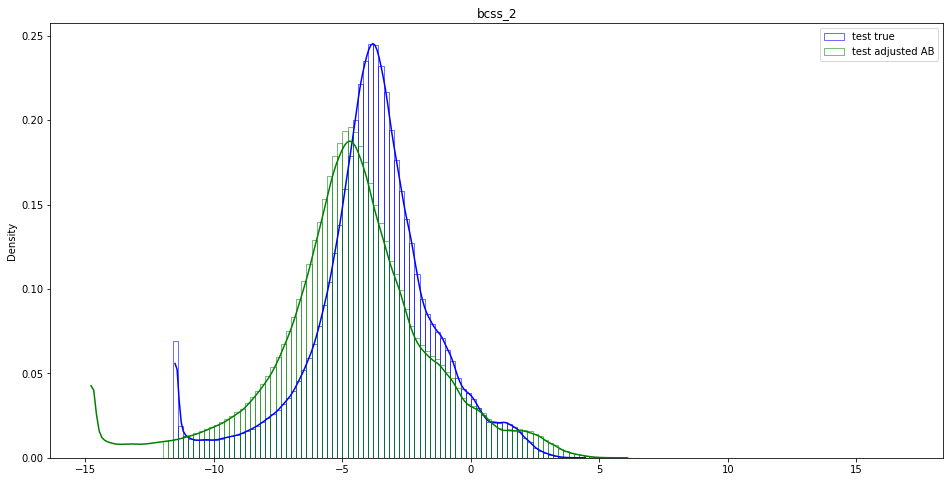

In [9]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
fill=False

a=sns.histplot(test, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='test true')
a=sns.histplot(AB_test_adjusted, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='test adjusted AB')
# a=sns.histplot(AKF_test_adjusted, bins=bin_range, stat='density',color='purple', kde=True, fill=True, label='test adjusted AKF')
# a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=True, label='x0 true')
leg = ax.legend(loc="upper right")
plt.title(title)
plt.show()
np.save(title+"_test_adjusted_AB", AB_test_adjusted)
np.save(title+"_test_adjusted_AKF", AKF_test_adjusted)


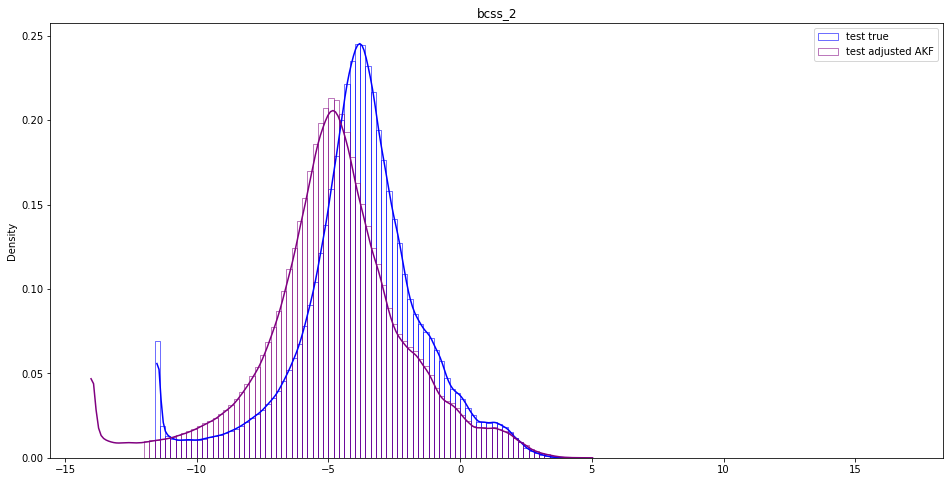

In [10]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
fill=False

a=sns.histplot(test, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='test true')
# a=sns.histplot(AB_test_adjusted, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='test adjusted AB')
a=sns.histplot(AKF_test_adjusted, bins=bin_range, stat='density',color='purple', kde=True, fill=fill, label='test adjusted AKF')
# a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=fill, label='x0 true')
leg = ax.legend(loc="upper right")
plt.title(title)
plt.show()

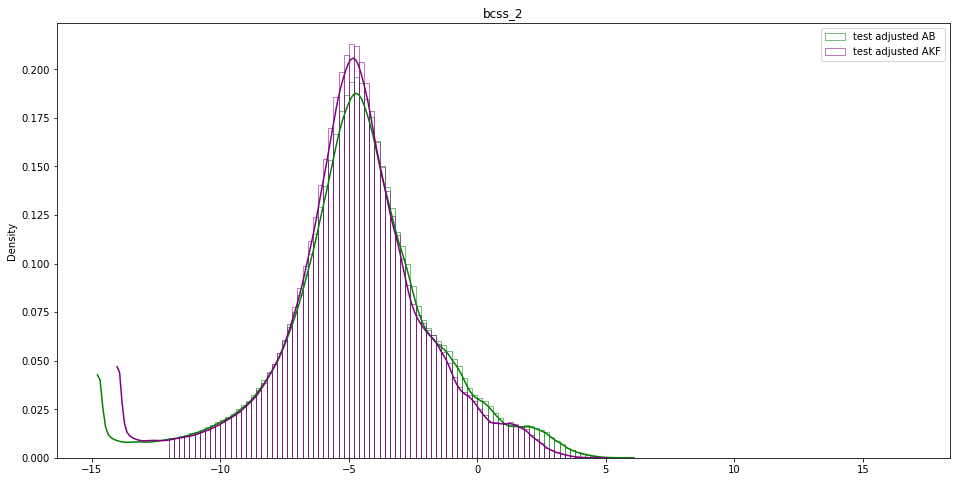

In [11]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
fill=False

# a=sns.histplot(test, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='test true')
a=sns.histplot(AB_test_adjusted, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='test adjusted AB')
a=sns.histplot(AKF_test_adjusted, bins=bin_range, stat='density',color='purple', kde=True, fill=fill, label='test adjusted AKF')
# a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=True, label='x0 true')
leg = ax.legend(loc="upper right")
plt.title(title)
plt.show()
# np.save(title+"_test_adjusted_AB", AB_test_adjusted)
# np.save(title+"_test_adjusted_AKF", AKF_test_adjusted)

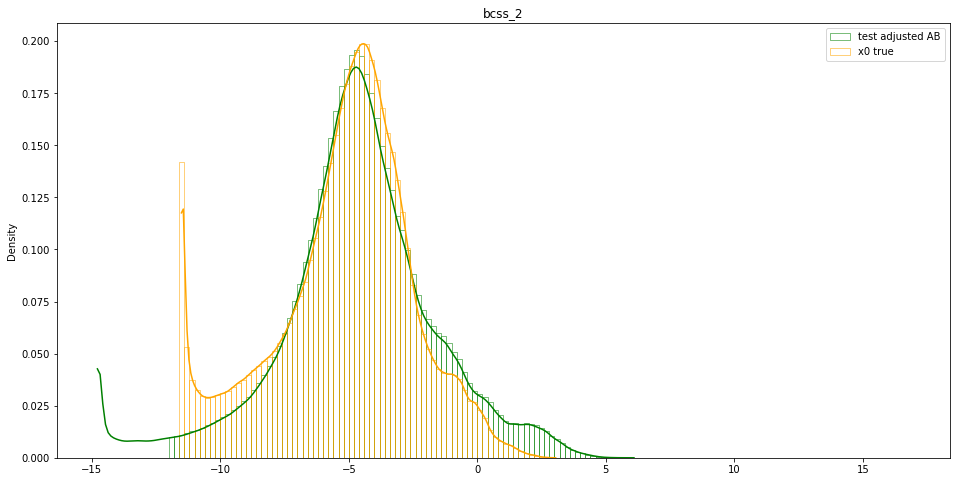

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
fill=False

# a=sns.histplot(test, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='test true')
a=sns.histplot(AB_test_adjusted, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='test adjusted AB')
# a=sns.histplot(AKF_test_adjusted, bins=bin_range, stat='density',color='purple', kde=True, fill=fill, label='test adjusted AKF')
a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=fill, label='x0 true')
leg = ax.legend(loc="upper right")
plt.title(title)
plt.show()

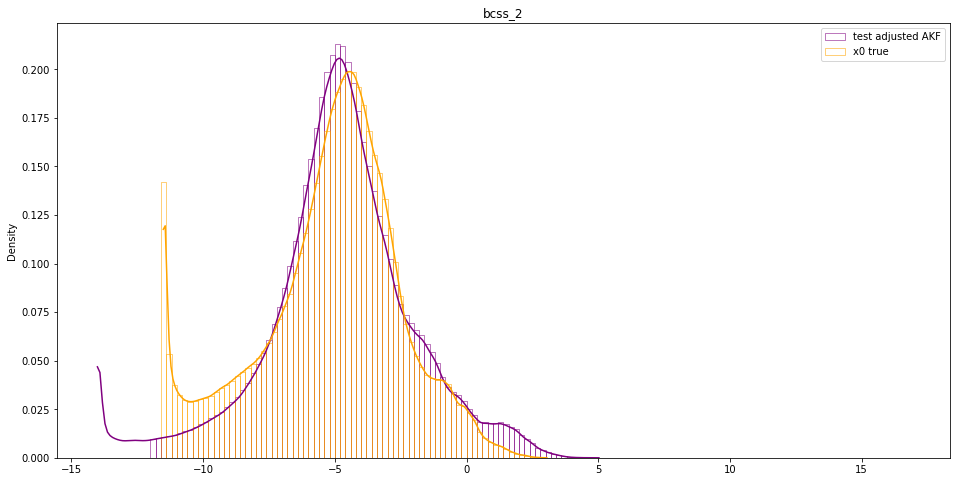

In [13]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)
fill=False

# a=sns.histplot(test, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='test true')
# a=sns.histplot(AB_test_adjusted, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='test adjusted AB')
a=sns.histplot(AKF_test_adjusted, bins=bin_range, stat='density',color='purple', kde=True, fill=fill, label='test adjusted AKF')
a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=fill, label='x0 true')
leg = ax.legend(loc="upper right")
plt.title(title)
plt.show()

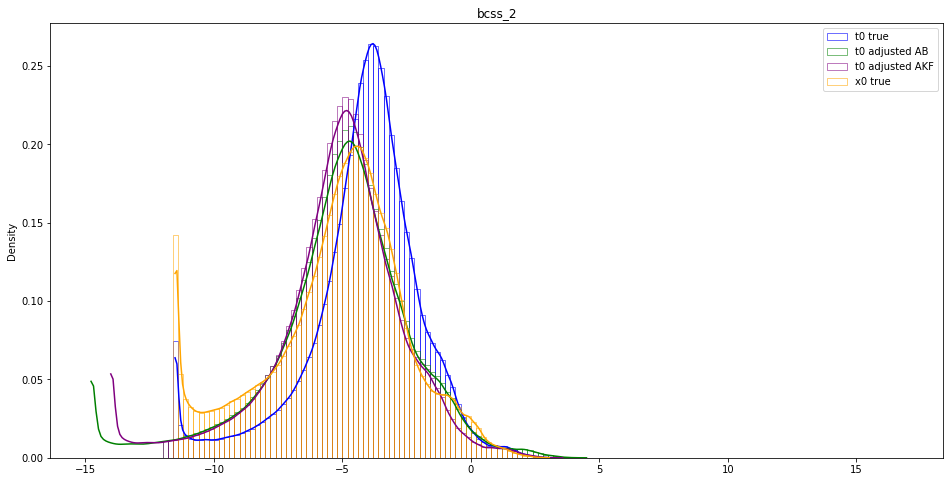

In [14]:
fig, ax = plt.subplots(figsize=(16,8))

bin_range = np.arange(-12,17,0.2)

a=sns.histplot(t0, bins=bin_range, stat='density',color='blue', kde=True, fill=fill, label='t0 true')
a=sns.histplot(AB_test_adjusted_neg, bins=bin_range, stat='density',color='green', kde=True, fill=fill, label='t0 adjusted AB')
a=sns.histplot(AKF_test_adjusted_neg, bins=bin_range, stat='density',color='purple', kde=True, fill=fill, label='t0 adjusted AKF')
a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=fill, label='x0 true')
leg = ax.legend(loc="upper right")
# plt.xlim((1, 10))
# plt.ylim((0, 0.025))
np.save(title+"_test_neg_adjusted_AB", AB_test_adjusted_neg)
np.save(title+"_test_neg_adjusted_AKF", AKF_test_adjusted_neg)

plt.title(title)
plt.show()

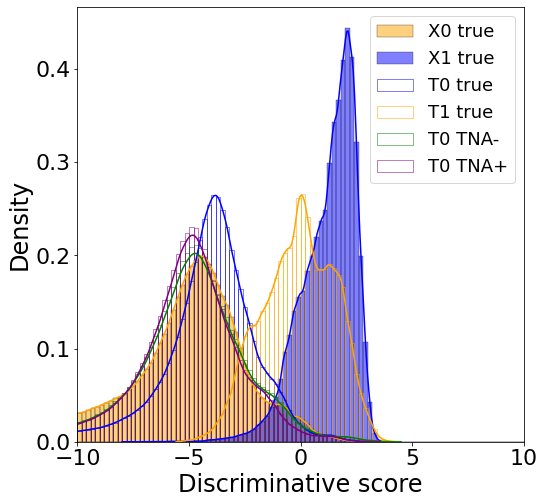

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

bin_range = np.arange(-12,17,0.2)

# Set global font sizes using rcParams
plt.rcParams['font.size'] = 24          # Default text size
plt.rcParams['axes.titlesize'] = 26     # Title size
plt.rcParams['axes.labelsize'] = 24     # Axis label size
plt.rcParams['xtick.labelsize'] = 22    # X-axis tick label size
plt.rcParams['ytick.labelsize'] = 22    # Y-axis tick label size
plt.rcParams['legend.fontsize'] = 18    # Legend font size

a=sns.histplot(x0, bins=bin_range, stat='density',color='orange', kde=True, fill=True, label='X0 true')
a=sns.histplot(x1, bins=bin_range, stat='density',color='blue', kde=True, fill=True, label='X1 true')
a=sns.histplot(t0, bins=bin_range, stat='density',color='blue', kde=True, fill=False, label='T0 true')
a=sns.histplot(t1, bins=bin_range, stat='density',color='orange', kde=True, fill=False, label='T1 true')
a=sns.histplot(AB_test_adjusted_neg, bins=bin_range, stat='density',color='green', kde=True, fill=False, label='T0 TNA-')
a=sns.histplot(AKF_test_adjusted_neg, bins=bin_range, stat='density',color='purple', kde=True, fill=False, label='T0 TNA+')
leg = ax.legend(loc="upper right")
plt.xlim((-10, 10))
# plt.ylim((0, 0.2))
np.save(title+"_test_neg_adjusted_AB", AB_test_adjusted_neg)
np.save(title+"_test_neg_adjusted_AKF", AKF_test_adjusted_neg)
plt.xlabel("Discriminative score")

plt.title("")
plt.savefig(title+"_neg_score_dist.pdf", bbox_inches='tight')
plt.savefig(title+"_neg_score_dist.png", bbox_inches='tight')
plt.show()


NameError: name 'test_neg_prime' is not defined

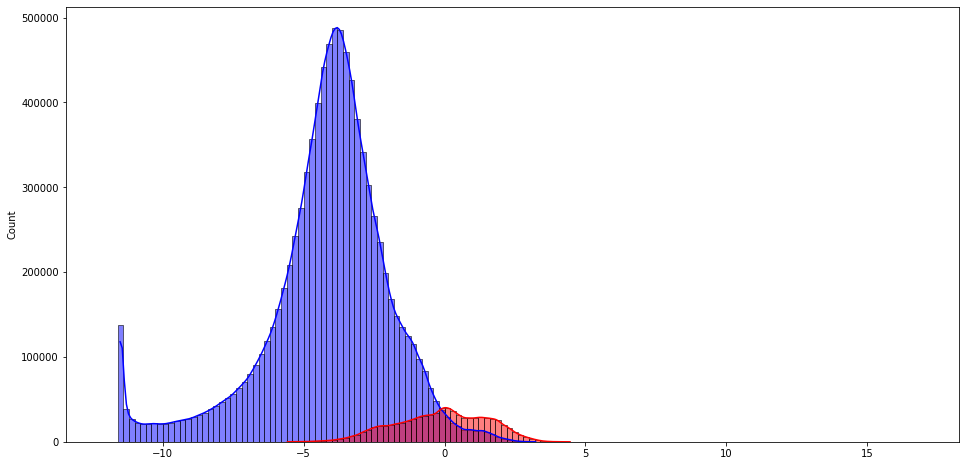

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
stat='count'
a=sns.histplot(t0, bins=bin_range, stat=stat, color='blue', kde=True, fill=True)
a=sns.histplot(t1, bins=bin_range, stat=stat, color='red', kde=True, fill=True)
a=sns.histplot(test_neg_prime, bins=bin_range, stat=stat, color='purple', kde=True, fill=True)
a=sns.histplot(test_pos_prime, bins=bin_range, stat=stat, color='orange', kde=True, fill=True)

test_score_neg_upd = (test_neg_prime - np.mean(test_neg_prime)) /  np.std(test_neg_prime) * np.std(x0) + np.mean(x0)
test_prime_ab = (test_adjusted - np.mean(test_neg_prime)) /  np.std(test_neg_prime) * np.std(x0) + np.mean(x0)
a=sns.histplot(test_score_neg_upd, bins=bin_range, stat=stat, color='green', kde=True, fill=True)
print('mean test_neg: ', np.mean(test_neg_prime))
print('std test_neg: ', np.std(test_neg_prime))
print('mean test_neg true: ', np.mean(t0))
print('std test_neg true: ', np.std(t0))


In [ ]:
bin_midpoints = (bin_range[:-1]+bin_range[1:])/2
[X_s,_] = np.histogram(train, density=True, bins=bin_range)
[T_s,_] = np.histogram(test, density=True, bins=bin_range)
[X_1,_] = np.histogram(x1, density=True, bins=bin_range)
[X_0,_] = np.histogram(x0, density=True, bins=bin_range)
[T_1,_] = np.histogram(t1, density=True, bins=bin_range)
[T_0,_] = np.histogram(t0, density=True, bins=bin_range)

X_1 = X_1/np.sum(X_1)
X_0 = X_0/np.sum(X_0)

beta_prime = len(test[test<0.0])/len(test)
print(beta_prime)

# beta_prime = beta


ratio = X_1/(beta_prime*X_0+(1-beta_prime)*X_1)
ratio[np.isnan(ratio)] = 0

neg=np.max(np.where(ratio>=1/(1-beta_prime)*0.99))
# print(neg)
ratio[neg:]=1/(1-beta_prime)

T_1a = T_s*ratio
T_a = (T_s-(1-beta_prime)*T_1a)/(beta_prime)
T_a = T_a/np.sum(T_a)

# fig, ax = plt.subplots(figsize=(16,8))
# plt.bar(bin_range[:-1], T_s, alpha=0.99)
# plt.bar(bin_range[:-1], (beta)*T_a, alpha=1)  # Approximated test null
# plt.bar(bin_range[:-1], (beta)*T_0/np.sum(T_0), alpha=1)  # True test null|

mean_x0 = np.sum(bin_midpoints*X_0/np.sum(X_0))
std_x0 = np.sqrt(np.sum(X_0/np.sum(X_0)*(bin_midpoints-mean_x0)**2))

mean_ta = np.sum(T_a*bin_midpoints)
std_ta = np.sqrt(np.sum(T_a*(bin_midpoints-mean_ta)**2))

mean_t0 = np.sum(T_0/np.sum(T_0)*bin_midpoints)
std_t0 = np.sqrt(np.sum(T_0/np.sum(T_0)*(bin_midpoints-mean_t0)**2))

# std_ta=2.657
# mean_ta = -4.3727

# print(mean_x0)
# print(std_x0)
# print(np.std(x0))
# print(np.mean(x0))

# print(mean_ta)
# print(std_ta)
std_x0 = np.sqrt(np.sum(X_0/np.sum(X_0)*(bin_midpoints-mean_x0)**2))

print('T_a mean: ', np.sum(T_a*bin_midpoints))
print('T_a std: ', std_ta)
print('T_0 mean: ',mean_t0)
print('T_0 std: ', std_t0)


print('X_0 mean: ', np.sum(X_0/np.sum(X_0)*bin_midpoints))
print('X_0 std: ', std_x0)

print('x0 original mean: ', np.mean(x0))
print('x0 original std:', np.std(x0))

test_prime_akf = (test-mean_ta)/std_ta*std_x0+mean_x0
# test_ta_prime_akf = (ta-mean_ta)/std_ta*std_x0+mean_x0

print('test_prime mean: ', np.mean(test_prime_akf))
print('test_prime std: ', np.std(test_prime_akf))

print('test_true mean: ', np.mean(test))
print('test_true std: ', np.std(test))

stat=False
[T_0,_] = np.histogram(t0, density=stat, bins=bin_range)
[T_s,_] = np.histogram(test, density=stat, bins=bin_range)
[X_0,_] = np.histogram(x0, density=stat, bins=bin_range)
[T_ap,_] = np.histogram(test_prime, density=stat, bins=bin_range)

# plt.bar(bin_range[:-1], X_0, alpha=1)  # Approximated test null
# plt.bar(bin_range[:-1], T_0, alpha=0.5)
# plt.bar(bin_range[:-1], T_ap, alpha=0.5)  # True test null|
# plt.bar(bin_range[:-1], T_s, alpha=0.5)  # True test null|



In [ ]:
# fig, ax = plt.subplots(figsize=(16,8))
# stat='count'
# fill = False
# a=sns.histplot(test_prime_ab, bins=bin_range, stat=stat, color='blue', kde=True, fill=fill)
# a=sns.histplot(test_prime_akf, bins=bin_range, stat=stat, color='red', kde=True, fill=fill)
# a=sns.histplot(test, bins=bin_range, stat=stat, color='green', kde=True, fill=fill)



In [ ]:
[T_1,_] = np.histogram(t1, density=True, bins=bin_range)
[T_0,_] = np.histogram(t0, density=True, bins=bin_range)
T_0 = normalize_histogram(T_0)
T_1 = normalize_histogram(T_1)


# Andrey's TNA but reimplemented by AKF
[X_s,_] = np.histogram(train, density=True, bins=bin_range)
[T_s,_] = np.histogram(test, density=True, bins=bin_range)
[X_1,_] = np.histogram(x1, density=True, bins=bin_range)
[X_0,_] = np.histogram(x0, density=True, bins=bin_range)

def normalize_histogram(hist):
    return hist/np.sum(hist)

X_s = normalize_histogram(X_s)
T_s = normalize_histogram(T_s)
X_0 = normalize_histogram(X_0)
X_1 = normalize_histogram(X_1)


pi0  = len(x0) / len(train)    # was
pi0_test  = len(test[test<0]) / len(test)   # now

fig, ax = plt.subplots(figsize=(16,8))
bar_width = 0.2
line_width = 4
plt.plot(bin_range[:-1], T_0/np.sum(T_0),alpha=1, label='True T0', linewidth=line_width)

X_0_adj = X_0*1  # Make a copy


idx = np.where(bin_range[:-1]>0)
X_0_adj[idx] = X_0_adj[idx] / pi0 * pi0_test  # Re-adjust the positive part
X_0_adj = normalize_histogram(X_0_adj)

plt.plot(bin_range[:-1], X_0, alpha=1, label='X_0', linewidth=line_width)
plt.plot(bin_range[:-1], X_0_adj, alpha=1, label='X_0_adj', linewidth=line_width)

null_proportion = X_0_adj/X_s*pi0
null_proportion[np.isnan(null_proportion)] = 0

plt.plot(bin_range[:-1], T_s, alpha=1, label='T_s ', linewidth=line_width)

T_a2 = 1*T_s*null_proportion   # Make a copy of Ts
plt.plot(bin_range[:-1], T_a2, alpha=1, label='T_a2 step 0 ', linewidth=line_width)
# T_a2[idx] = 0  # Erase positive prediction

T_a2 = normalize_histogram(T_a2)

plt.plot(bin_range[:-1], T_a2, alpha=1, label='T_a2 step 1', linewidth=line_width)

idx = np.where(np.logical_and(bin_range[:-1] > -0.0, bin_range[:-1] < 6))
T_a2[idx] = T_s[idx]*null_proportion[idx]

plt.plot(bin_range[:-1], T_a2, alpha=1, label='T_a2 step 2', linewidth=line_width)

T_a2 = normalize_histogram(T_a2)

plt.plot(bin_range[:-1], T_a2, alpha=1, label='T_a2 step 3', linewidth=line_width)

bin_midpoints = (bin_range[:-1]+bin_range[1:])/2
mean_ta2 = np.sum(T_a2*bin_midpoints)
std_ta2 = np.sqrt(np.sum(T_a2 * (bin_midpoints-mean_ta2)**2))

print('T_a2 mean: ', mean_ta2)
print('T_a2 std: ', std_ta2)

print('T_0 true mean: ', np.mean(t0))
print('T_0 true std: ', np.std(t0))

# fig, ax = plt.subplots(figsize=(16,8))
# bar_width = 0.2
# line_width = 4

# plt.bar(bin_range[:-1], T_s, alpha=1, width=bar_width)
# plt.plot(bin_range[:-1], T_s, alpha=1, label='True', linewidth=line_width)

# plt.plot(bin_range[:-1], null_proportion, alpha=1, label='True', linewidth=line_width)
# plt.plot(bin_range[:-1], X_0*pi0, alpha=1, label='X_0_pi0', linewidth=line_width)
# plt.plot(bin_range[:-1], X_0_adj*pi0, alpha=1, label='X_0_adj_pi0', linewidth=line_width)
# # plt.plot(bin_range[:-1], X_s, alpha=1, label='Xs', linewidth=line_width)
# plt.plot(bin_range[:-1], T_a2, alpha=1, label='Ta2', linewidth=line_width)
# plt.plot(bin_range[:-1], T_0, alpha=1, label='T0', linewidth=line_width)
# plt.plot(bin_range[:-1], T_s, alpha=1, label='Ts', linewidth=line_width)


leg = ax.legend(loc="upper right")
plt.show()



In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
stat='density'
fill = False
bar_width = 0.2
line_width = 4
[test_neg_prime_hist,_] = np.histogram(test_neg_prime, density=True, bins=bin_range)


# a=sns.histplot(test_neg_prime, bins=bin_range, stat=stat, color='blue', kde=True, fill=fill)
plt.bar(bin_range[:-1], T_0/np.sum(T_0),alpha=1, width=bar_width)
plt.plot(bin_range[:-1], T_0/np.sum(T_0),alpha=1, label='True T0', linewidth=line_width)
plt.bar(bin_range[:-1], test_neg_prime_hist/np.sum(test_neg_prime_hist), alpha=0.8, width=bar_width)
plt.plot(bin_range[:-1], test_neg_prime_hist/np.sum(test_neg_prime_hist), alpha=0.8, label='TNA - AB', linewidth=line_width)
plt.bar(bin_range[:-1], T_a, alpha=0.5, width=bar_width)
plt.plot(bin_range[:-1], T_a, alpha=0.5, label='TNA - AKF', linewidth=line_width)
plt.plot(bin_range[:-1], T_a2, alpha=1, label='TNA - AB by AKF', linewidth=line_width)

# a=sns.histplot(, bins=bin_range, stat=stat, color='red', kde=True, fill=fill)
# a=sns.histplot(T_a, bins=bin_range, stat=stat, color='green', kde=True, fill=fill)
leg = ax.legend(loc="upper right")
plt.show()


In [ ]:
bin_midpoints = (bin_range[:-1]+bin_range[1:])/2
[X_s,_] = np.histogram(train, density=True, bins=bin_range)
[T_s,_] = np.histogram(test, density=True, bins=bin_range)
[X_1,_] = np.histogram(x1, density=True, bins=bin_range)
[X_0,_] = np.histogram(x0, density=True, bins=bin_range)
[T_1,_] = np.histogram(t1, density=True, bins=bin_range)
[T_0,_] = np.histogram(t0, density=True, bins=bin_range)

X_1 = X_1/np.sum(X_1)
X_1 = X_1/np.sum(X_0)
# X_1 = X_1/np.sum(X_1)
# X_1 = X_1/np.sum(X_1)
# X_1 = X_1/np.sum(X_1)
beta_prime = beta
beta_prime = len(test[test<0.0])/len(test)
ratio = X_1/(beta_prime*X_0+(1-beta_prime)*X_1)

print(X_1)
print(beta_prime*X_0+(1-beta_prime)*X_1)
ratio[np.isnan(ratio)] = 0

neg=np.max(np.where(ratio>=1/(1-beta_prime)*0.99))
print(neg)
ratio[neg:]=1

T_1a = T_s*ratio
T_a = (T_s-(1-beta_prime)*T_1a)/(beta_prime)
T_a = T_a/np.sum(T_a)


fig, ax = plt.subplots(figsize=(16,8))
stat='density'
fill = False
bar_width = 0.2
line_width = 4


# a=sns.histplot(test_neg_prime, bins=bin_range, stat=stat, color='blue', kde=True, fill=fill)
plt.bar(bin_range[:-1], T_s/np.sum(T_s),alpha=1, width=bar_width)
# plt.plot(bin_range[:-1], T_0/np.sum(T_0),alpha=1, label='True', linewidth=line_width)
plt.bar(bin_range[:-1], T_1a/np.sum(T_1a), alpha=0.8, width=bar_width)
# plt.plot(bin_range[:-1], test_neg_prime_hist/np.sum(test_neg_prime_hist), alpha=0.8, label='TNA - AB', linewidth=line_width)
# plt.bar(bin_range[:-1], T_1/np.sum(T_1), alpha=0.5, width=bar_width)
# plt.bar(bin_range[:-1], X_1/np.sum(X_1), alpha=0.5, width=bar_width)
# plt.plot(bin_range[:-1], ratio, alpha=0.5, label='TNA - AKF', linewidth=line_width)
# plt.plot(bin_range[:-1], T_a, alpha=0.5, label='TNA - AKF', linewidth=line_width)
# a=sns.histplot(, bins=bin_range, stat=stat, color='red', kde=True, fill=fill)
# a=sns.histplot(T_a, bins=bin_range, stat=stat, color='green', kde=True, fill=fill)
leg = ax.legend(loc="upper right")
plt.show()


In [ ]:
# Andrey original

# num_bins = 50 
# bin_edges = np.linspace(np.min(tr_neg), np.max(tr_neg), num_bins + 1)

# train = np.concatenate([tr_neg, tr_pos])

# bin_count_train_neg = np.bincount(np.digitize(tr_neg, bin_edges))
# bin_count_train_pos = np.bincount(np.digitize(tr_pos, bin_edges))

# was  = tr_neg.shape[0] / train.shape[0]
# now  = self.scores['test_neg_a'].shape[0] / self.scores['test_a'].shape[0]

# bin_count_train_neg[-20:-10] = bin_count_train_neg[-20:-10] / was * now
# bin_count_train = bin_count_train_neg + bin_count_train_pos

# bin_index_test      = np.digitize(self.scores['test_a'], bin_edges)
# bin_count_test      = np.bincount(bin_index_test)
# bin_index_test_neg  = np.digitize(self.scores['test_neg_a'], bin_edges)
# bin_count_test_neg  = np.bincount(bin_index_test_neg)[:-1]
# bin_index_test_pos  = np.digitize(self.scores['test_pos_a'], bin_edges)
# bin_count_test_pos  = np.bincount(bin_index_test_neg)[:-1]

# train_relate    = bin_count_train_neg / bin_count_train
# self.lamb        = np.nansum(bin_count_test * train_relate / self.scores['test_a'].shape[0])    
# train_relate    = (np.nan_to_num(train_relate, nan=1) * bin_count_test).round().astype(int)

# negative_list, positive_list = [], []
# for i, _ in tqdm(enumerate(bin_edges)):
#     if i > 30 and i < 48:
#         negative_list.extend(self.scores['test_a'][bin_index_test == i][:train_relate[i+1]])
#         positive_list.extend(self.scores['test_a'][bin_index_test == i][train_relate[i+1]:])

# self.scores['test_neg_a'] = np.concatenate([negative_list, 
#                                 self.scores['test_neg_a'][self.scores['test_neg_a'] < bin_edges[30]],
#                                           self.scores['test_neg_a'][self.scores['test_neg_a'] > bin_edges[47]]])
# self.scores['test_pos_a'] = np.concatenate([positive_list, 
#                                 self.scores['test_pos_a'][self.scores['test_pos_a'] < bin_edges[30]],
#                                 self.scores['test_pos_a'][self.scores['test_pos_a'] > bin_edges[47]]])